In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(96,96))

Found 101965 images belonging to 2 classes.


In [4]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(96,96))

Found 20076 images belonging to 2 classes.


In [5]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (96,96))
        img = img / 255.0
        return img

In [6]:
model = Sequential()

pretrained_model= tf.keras.applications.DenseNet201(include_top=False,
                   input_shape= (96,96,3),
                   pooling='max',classes=2,
                   weights='imagenet')

model.add(pretrained_model)

In [7]:

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='sigmoid'))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 18,855,042
Trainable params: 18,625,986
Non-trainable params: 229,056
_________________________________________________________________


In [9]:

model.compile(optimizer=Adam(lr=3e-4),loss = 'hinge',metrics=['acc'])
history = model.fit(trainingdt,validation_data= testingdt,epochs=10,steps_per_epoch=100) 

C:\Users\viola\anaconda3\envs\keras_env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
100/100 [==============================] - 2446s 24s/step - loss: 0.8694 - acc: 0.6734 - val_loss: 1.0009 - val_acc: 0.5296
Epoch 2/10
100/100 [==============================] - 2339s 24s/step - loss: 0.8701 - acc: 0.6575 - val_loss: 0.9047 - val_acc: 0.6208
Epoch 3/10
100/100 [==============================] - 2506s 25s/step - loss: 0.9075 - acc: 0.6156 - val_loss: 0.9355 - val_acc: 0.5850
Epoch 4/10
100/100 [==============================] - 2212s 22s/step - loss: 0.9247 - acc: 0.5941 - val_loss: 0.9973 - val_acc: 0.5189
Epoch 5/10
100/100 [==============================] - 6966s 70s/step - loss: 0.8915 - acc: 0.6225 - val_loss: 1.0496 - val_acc: 0.4645
Epoch 6/10
100/100 [==============================] - 1280s 13s/step - loss: 0.8525 - acc: 0.6616 - val_loss: 0.8552 - val_acc: 0.6575
Epoch 7/10
100/100 [==============================] - 1254s 13s/step - loss: 0.8244 - acc: 0.6869 - val_loss: 0.9658 - val_acc: 0.5448
Epoch 8/10
100/100 [==============================] - 1

In [10]:
model.save('densenet201sigmoid.h5')

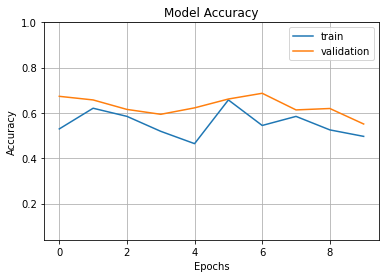

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

plt.axis(ymin=0.04,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

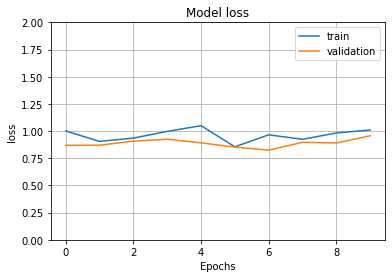

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.axis(ymin=0,ymax=2)
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
y_actual= testingdt.labels
pred= model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
from sklearn.metrics import classification_report
print(classification_report(pred, y_actual, target_names=['fake(class0)', 'real(class1)']))

              precision    recall  f1-score   support

fake(class0)       0.03      0.48      0.06       628
real(class1)       0.97      0.50      0.66     19448

    accuracy                           0.50     20076
   macro avg       0.50      0.49      0.36     20076
weighted avg       0.94      0.50      0.64     20076



[[ 311 9719]
 [ 317 9729]]


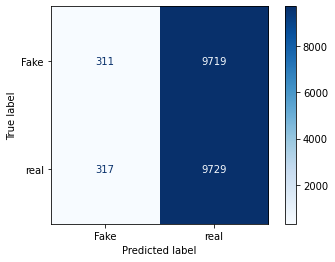

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
y_actual= testingdt.labels
pred= model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
cm=confusion_matrix(y_actual,pred)
print(cm)
labels = ["Fake", "real"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

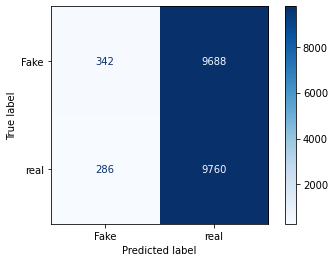

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
labels = ["Fake", "real"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(96,96))

Found 20076 images belonging to 2 classes.


In [19]:
y_actual= testingdt.labels
print(y_actual)

[0 0 0 ... 1 1 1]
